#### Name - Ritika Tomar
#### Roll No - 2018IMT-084
#### Course - Machine Learning
#### Course Code - ITIT-4107-2021
#### Assignment Number - 6
#### Deadline - 15-11-21

### Importing Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv("iris.data")

### Data Pre-processing

In [2]:
from sklearn.preprocessing import LabelEncoder
le_class = LabelEncoder()
data['class'] = le_class.fit_transform(data['class'])

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
print("Unique Class = ",data['class'].unique())
print("Number of unique class = ",data['class'].nunique())

Unique Class =  [0 1 2]
Number of unique class =  3


In [6]:
X = data.filter(['sepal_length','sepal_width','petal_length','petal_width'])
y = data['class']

### Evaluation Metric

In [7]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    cm = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(cm,axis=0)) / np.sum(cm)

### EM Clustering Algorithm

In [8]:
from sklearn import mixture

method = list()
purity = list()

In [9]:
em = mixture.GaussianMixture(n_components=3, covariance_type='tied', max_iter=100, init_params='random')
em.fit(X)

y_clust_pred = em.predict(X)
method.append('EM Random 100 tied')
p = purity_score(y,y_clust_pred)
print("The purity score for the EM with 100 iteration and covariance_type=tied = ", p)
purity.append(p)

The purity score for the EM with 100 iteration and covariance_type=tied =  0.7266666666666667


In [10]:
em = mixture.GaussianMixture(n_components=3, covariance_type='full', max_iter=100, init_params='random')
em.fit(X)

y_clust_pred = em.predict(X)
method.append('EM Random 100 full')
p = purity_score(y,y_clust_pred)
print("The purity score for the EM with 100 iteration and covariance_type=full = ", p)
purity.append(p)

The purity score for the EM with 100 iteration and covariance_type=full =  0.7933333333333333


### K-Means Algorithm

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_clust_pred = kmeans.fit_predict(X)
method.append('K-Means')
p = purity_score(y,y_clust_pred)
print("The purity score for the KMeans with 300 iterations = ",p)
purity.append(p)

The purity score for the KMeans with 300 iterations =  0.8933333333333333


In [12]:
purity

[0.7266666666666667, 0.7933333333333333, 0.8933333333333333]

<AxesSubplot:title={'center':'Purity of various clustering algorithms'}, ylabel='Method'>

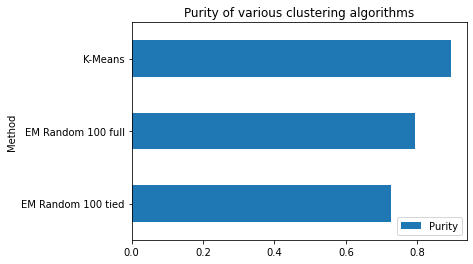

In [13]:
dic = {'Method': method, 'Purity': purity}

df = pd.DataFrame(dic)
df.plot.barh(x='Method',y='Purity',title='Purity of various clustering algorithms')

In [14]:
df

,Method,Purity
0,EM Random 100 tied,0.726667
1,EM Random 100 full,0.793333
2,K-Means,0.893333


### Dimensionality Reduction using PCA

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

covar_matrix = pca.get_covariance()

<AxesSubplot:>

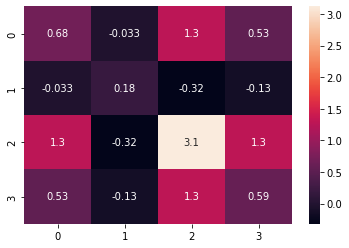

In [16]:
sns.heatmap(covar_matrix,annot=True)

### EM PCA

In [17]:
em_pca = mixture.GaussianMixture(n_components=3, covariance_type='full', max_iter=100, init_params='random')
em_pca.fit(X_new)

y_clust_pred = em_pca.predict(X_new)
method.append('EM Random 100 full PCA')
print("The purity score for the EM with 100 iteration and covariance_type=full after PCA Reduction = ", purity_score(y,y_clust_pred))
purity.append(purity_score(y,y_clust_pred))

The purity score for the EM with 100 iteration and covariance_type=full after PCA Reduction =  0.6666666666666666


In [18]:
em_pca = mixture.GaussianMixture(n_components=3, covariance_type='tied', max_iter=100, init_params='random')
em_pca.fit(X_new)

y_clust_pred = em_pca.predict(X_new)
method.append('EM Random 100 tied PCA')
print("The purity score for the EM with 100 iteration and covariance_type=tied after PCA Reduction = ", purity_score(y,y_clust_pred))
purity.append(purity_score(y,y_clust_pred))

The purity score for the EM with 100 iteration and covariance_type=tied after PCA Reduction =  0.6466666666666666


### K-Means PCA

In [19]:
kmeans_pca = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_clust_pred = kmeans_pca.fit_predict(X_new)
method.append('kmeans PCA')
print("The purity score for the KMeans with 300 iterations after PCA reduction = ",purity_score(y,y_clust_pred))
purity.append(purity_score(y,y_clust_pred))

The purity score for the KMeans with 300 iterations after PCA reduction =  0.8866666666666667


In [20]:
purity

[0.7266666666666667,
 0.7933333333333333,
 0.8933333333333333,
 0.6666666666666666,
 0.6466666666666666,
 0.8866666666666667]

<AxesSubplot:title={'center':'Purity of various clustering algorithms'}, ylabel='Method'>

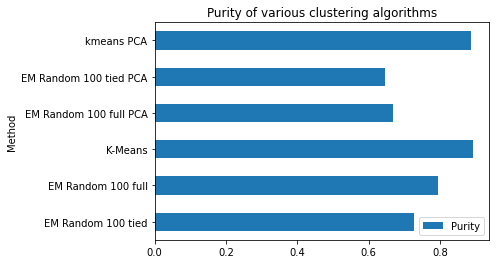

In [21]:
dic = {'Method': method, 'Purity': purity}

df = pd.DataFrame(dic)
df.plot.barh(x='Method',y='Purity',title='Purity of various clustering algorithms')

In [22]:
df

,Method,Purity
0,EM Random 100 tied,0.726667
1,EM Random 100 full,0.793333
2,K-Means,0.893333
3,EM Random 100 full PCA,0.666667
4,EM Random 100 tied PCA,0.646667
5,kmeans PCA,0.886667
